# Use seaborn's load_dataset function to load the iris database to answer the following questions:



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data

import seaborn as sns


In [112]:
iris = sns.load_dataset('iris')

iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
32,5.2,4.1,1.5,0.1,setosa
49,5.0,3.3,1.4,0.2,setosa
75,6.6,3.0,4.4,1.4,versicolor
56,6.3,3.3,4.7,1.6,versicolor
1,4.9,3.0,1.4,0.2,setosa


# What does the distribution of petal lengths look like?


<Axes: xlabel='petal_length', ylabel='Count'>

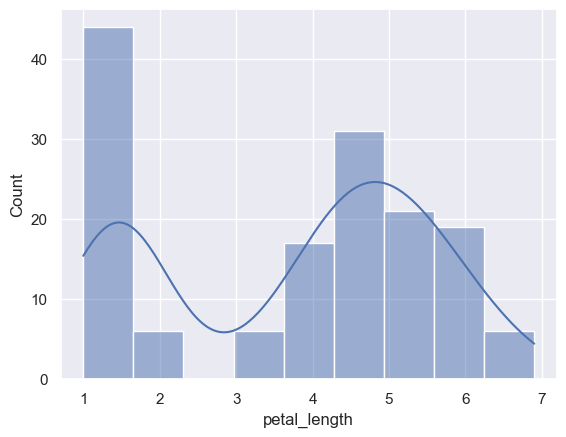

In [113]:
sns.set_theme(style="darkgrid")

sns.histplot(iris.petal_length, kde = True)


# Is there a relationship between petal length and petal width?


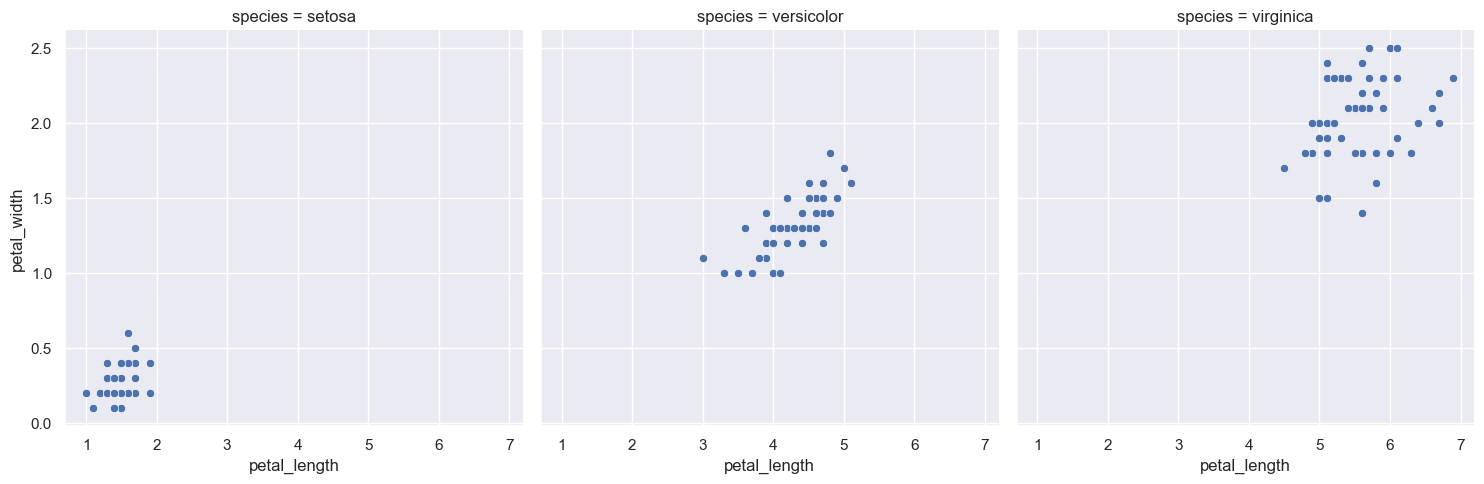

In [114]:
sns.set_theme(style="darkgrid")

sns.relplot(x= 'petal_length', y='petal_width',col='species', data=iris)


# Would it be reasonable to predict species based on sepal width and sepal length? For this, you'll visualize two numeric columns through the lense of a categorical column.


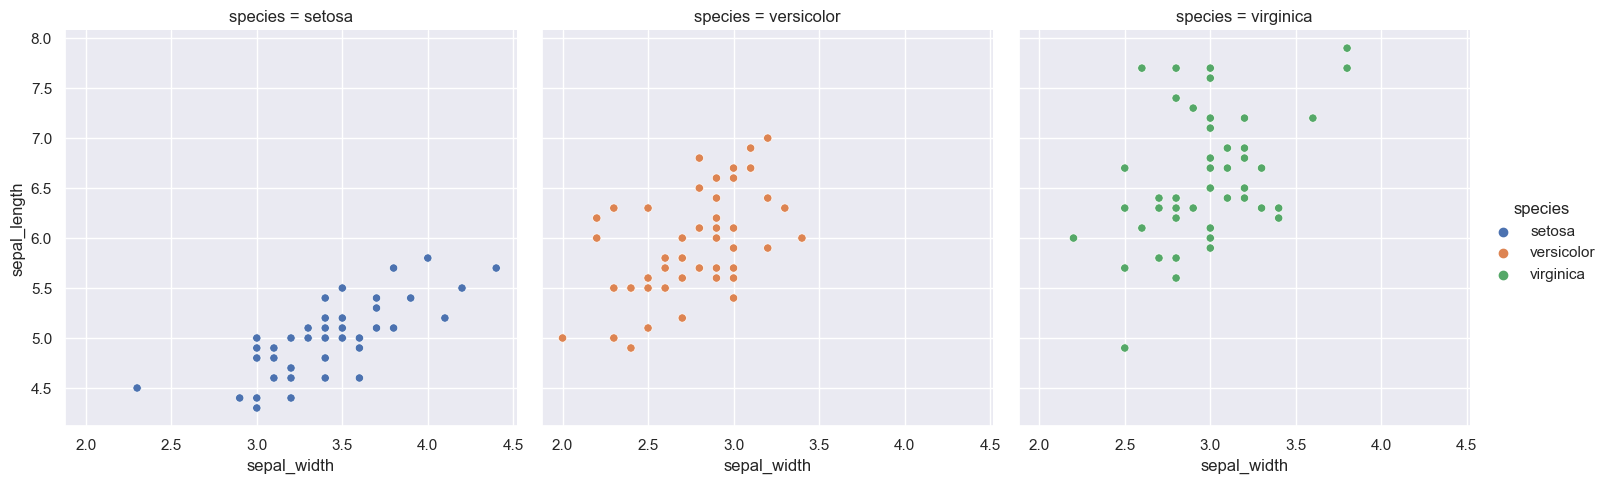

In [115]:
sns.set_theme(style="darkgrid")

sns.relplot(x='sepal_width', y='sepal_length', hue='species', col='species', data=iris)


# Which features would be best used to predict species?


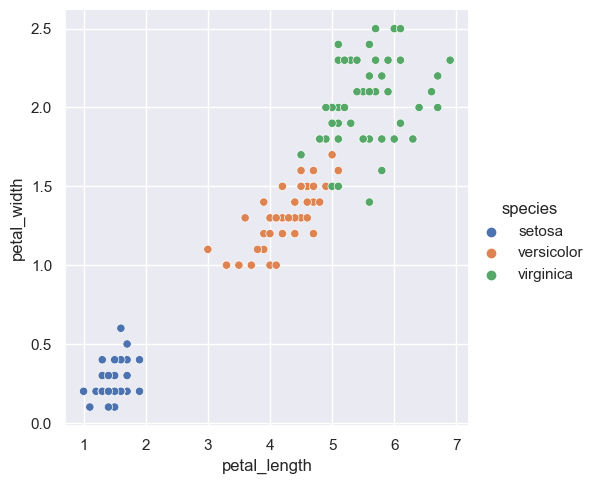

In [116]:
sns.set_theme(style="darkgrid")

sns.relplot(x= 'petal_length', y='petal_width',hue='species', data=iris)

# Load the anscombe dataset from seaborn. 

# Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. 

# What do you notice?



In [106]:
anscombe = sns.load_dataset('anscombe')

ds = anscombe.groupby('dataset').describe()
ds.T

dataset          I         II        III         IV
x count  11.000000  11.000000  11.000000  11.000000
  mean    9.000000   9.000000   9.000000   9.000000
  std     3.316625   3.316625   3.316625   3.316625
  min     4.000000   4.000000   4.000000   8.000000
  25%     6.500000   6.500000   6.500000   8.000000
  50%     9.000000   9.000000   9.000000   8.000000
  75%    11.500000  11.500000  11.500000   8.000000
  max    14.000000  14.000000  14.000000  19.000000
y count  11.000000  11.000000  11.000000  11.000000
  mean    7.500909   7.500909   7.500000   7.500909
  std     2.031568   2.031657   2.030424   2.030579
  min     4.260000   3.100000   5.390000   5.250000
  25%     6.315000   6.695000   6.250000   6.170000
  50%     7.580000   8.140000   7.110000   7.040000
  75%     8.570000   8.950000   7.980000   8.190000
  max    10.840000   9.260000  12.740000  12.500000

# Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

In [43]:
anscombe.sample(3)

,dataset,x,y
9,I,7.0,4.82
33,IV,8.0,6.58
11,II,10.0,9.14


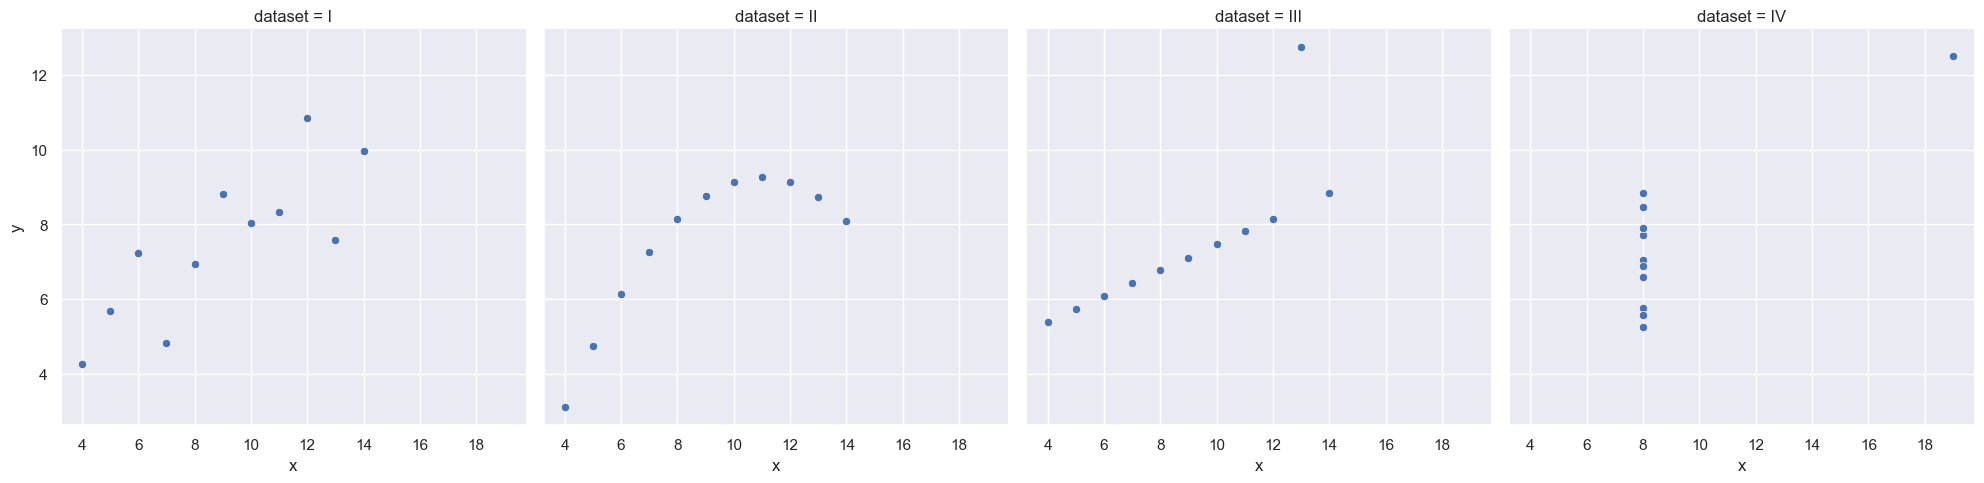

In [107]:
sns.set_theme(style="darkgrid")

sns.relplot(x= 'x', y='y',col='dataset', data=anscombe)

# Load the InsectSprays dataset from pydataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.



In [5]:
in_sp = data('InsectSprays')
in_sp.sample(4)


,count,spray
8,23,A
64,22,F
22,21,B
50,5,E


Text(0.5, 1.0, 'Insect title')

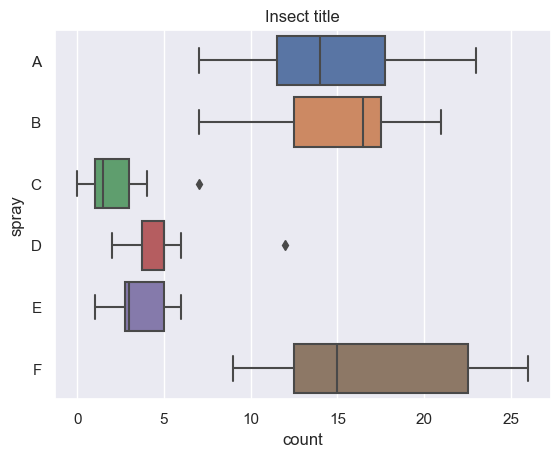

In [104]:
sns.set_theme(style="darkgrid")

sns.boxplot(data=in_sp, x='count', y='spray')
plt.title('Insect title')

# 3 Load the swiss dataset from pydataset and read it's documentation. Create visualizations to answer the following questions:



In [41]:
swiss = data('swiss')
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


## Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)


In [47]:
swiss['is_catholic'] = swiss['Catholic'] > 20.00
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,True
Neuveville,76.9,43.5,17,15,5.16,20.6,False


In [ ]:
Catholic

## Does whether or not a province is Catholic influence fertility?


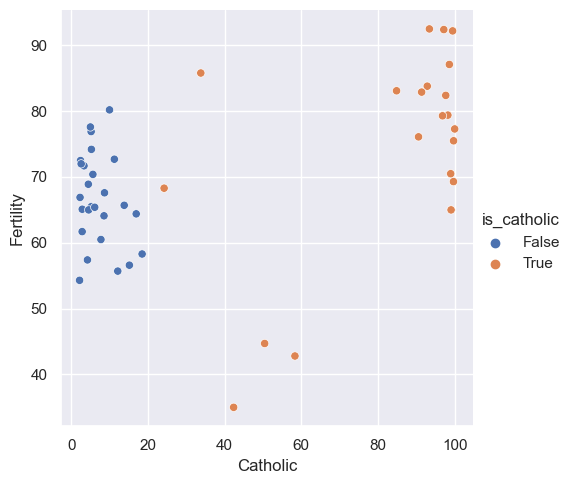

In [103]:
sns.set_theme(style="darkgrid")

sns.relplot(x='Catholic', y='Fertility', hue='is_catholic', data=swiss)


# What measure correlates most strongly with fertility?


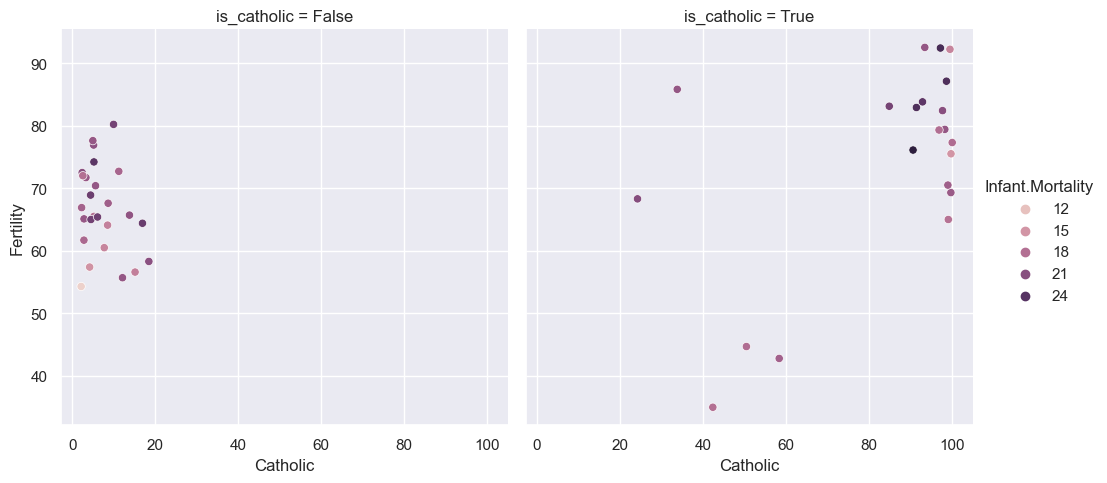

In [102]:
sns.set_theme(style="darkgrid")

sns.relplot(x='Catholic', y='Fertility', hue='Infant.Mortality', col='is_catholic', data=swiss)


# Load the chipotle dataset from SQL, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [74]:
import env
from env import user, host, password, host
def get_db_url(user, password, host, db):
    url = f'mysql+pymysql://{user}:{password}@{host}/{db}'
    return(url)




In [75]:

chipotle = f'mysql+pymysql://{user}:{password}@{host}/chipotle'
query = 'select * from orders'
chipotle_df = pd.read_sql(query, chipotle)
chipotle_df.sample(12)


,id,order_id,quantity,item_name,choice_description,item_price
4211,4212,1680,1,Bottled Water,nan,$1.50
2420,2421,961,1,Chicken Burrito,"[Roasted Chili Corn Salsa, [Fajita Vegetables, Rice]]",$8.75
4447,4448,1772,1,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.25
4454,4455,1775,1,Chicken Burrito,"[Tomatillo Red Chili Salsa, [Rice, Pinto Beans, Cheese]]",$8.75
2210,2211,891,1,Chips,nan,$2.15
2134,2135,859,1,Steak Burrito,"[Fresh Tomato Salsa (Mild), Black Beans]",$8.99
656,657,272,1,Chicken Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice, Sour Cream, Lettuce]]",$8.75
1836,1837,743,1,Chips and Guacamole,nan,$4.45
2650,2651,1052,1,Chips and Guacamole,nan,$4.45
1004,1005,412,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce]]",$8.75


<Axes: xlabel='item_name'>

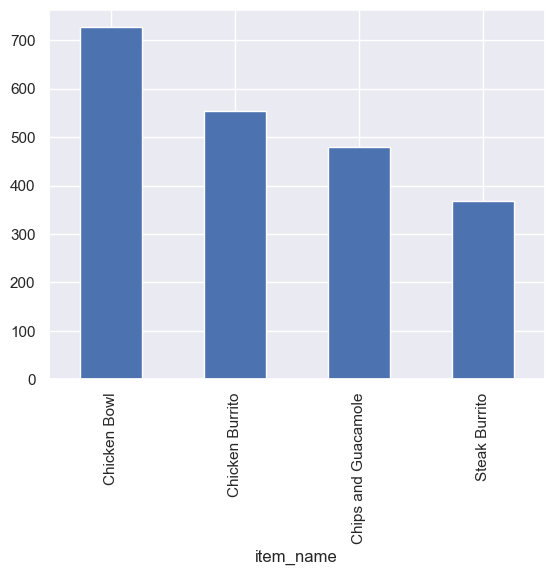

In [117]:
sns.set_theme(style="darkgrid")

chipotle_df.item_name.value_counts().head(4).plot.bar()

# Load the sleepstudy dataset from pydataset and read it's documentation. 

# Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.



In [3]:
sleep_study = data('sleepstudy')
sleep_study.sample(1)

,Reaction,Days,Subject
133,326.8785,2,352


In [4]:
sleep_study['Reaction'].sum(), len(sleep_study['Reaction'])

(53731.42049999999, 180)

In [5]:
sleep_study['avg_reac'] = sleep_study['Reaction'].sum() / len(sleep_study['Reaction'])
sleep_study.sample(4)

,Reaction,Days,Subject,avg_reac
173,297.5968,2,372,298.507892
65,297.1710,4,333,298.507892
82,273.9472,1,335,298.507892
42,285.0000,1,331,298.507892


<Axes: xlabel='Days', ylabel='Reaction'>

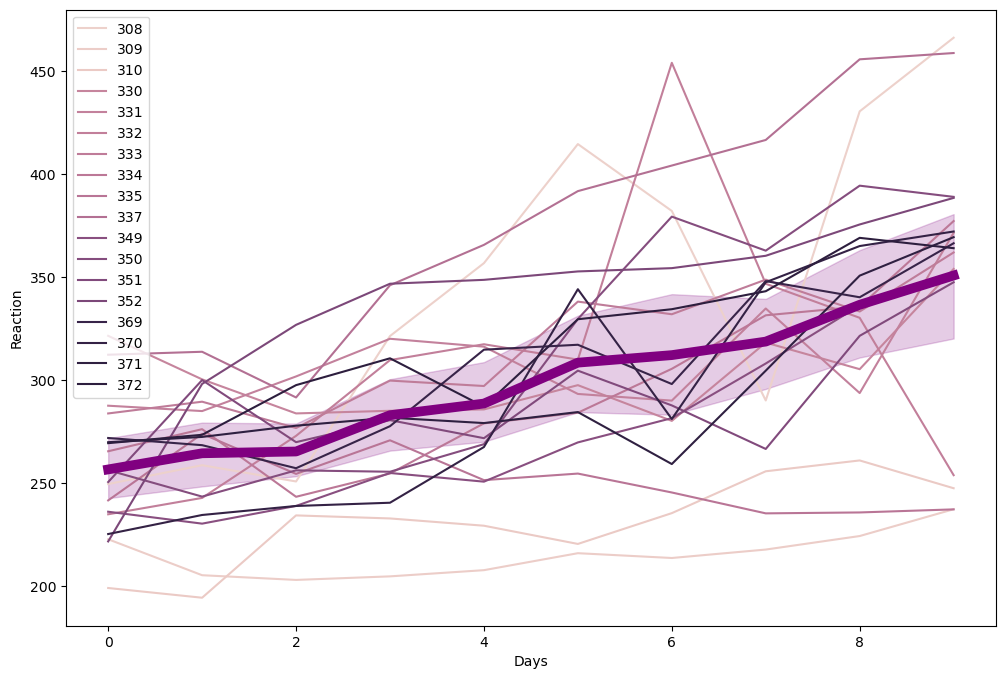

In [6]:
#determine figure size
plt.figure(figsize=(12,8))

#create the visual for subjects
sns.lineplot(data= sleep_study, x= 'Days', y= 'Reaction', hue= 'Subject', legend =all)

#create the visual for mean reaction time
sns.lineplot(data = sleep_study, x = 'Days', y = 'Reaction', color = 'purple', linewidth = 7, estimator = 'mean')

In [9]:
sleep_study.Subject = sleep_study.Subject.astype(str)

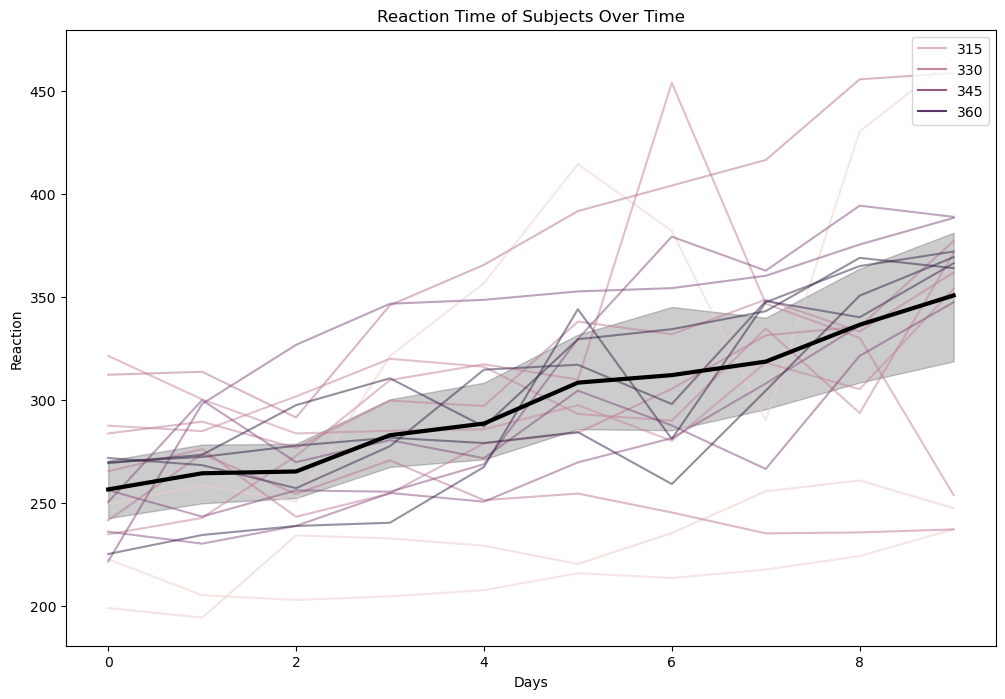

In [7]:
#now, with the Subject as a string- it is easier to visualize
plt.figure(figsize=(12,8))

sns.lineplot(data=sleep_study, x='Days', y='Reaction', hue='Subject', alpha=.5)
sns.lineplot(data=sleep_study, x='Days', y='Reaction', 
             color = 'black', linewidth=3)

plt.title('Reaction Time of Subjects Over Time')
plt.legend(loc='upper right')
plt.show()